## Q3: Decision Tree Classifier

### (a) Dataset Selection

In [41]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### (b) Loading the Dataset + Preprocessing

In [42]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
X = df.drop('Species',axis = 1)
y = df['Species']

y = LabelEncoder().fit_transform(y)

In [44]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.25,random_state=42,stratify=y)

### (c) Model Training

In [45]:
depths = [3,5,None]
models = {}
results = {}

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d,random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred  = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    train_acc = accuracy_score(y_test, y_test_pred)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)

    models[d] = clf
    results[d] = {'train_acc':train_acc,'test_acc':test_acc}

In [46]:
for d in depths:
    print(f"Depth = {d}: train_acc={results[d]['train_acc']:.3f}, test_acc={results[d]['test_acc']:.3f}")

Depth = 3: train_acc=1.000, test_acc=1.000
Depth = 5: train_acc=1.000, test_acc=1.000
Depth = None: train_acc=1.000, test_acc=1.000



=== Decision Tree (max_depth=3) ===
Test accuracy: 1.0

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



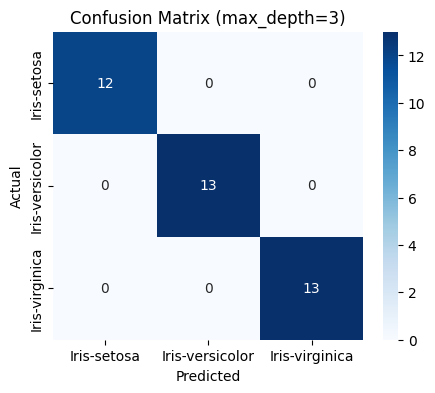


=== Decision Tree (max_depth=5) ===
Test accuracy: 1.0

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



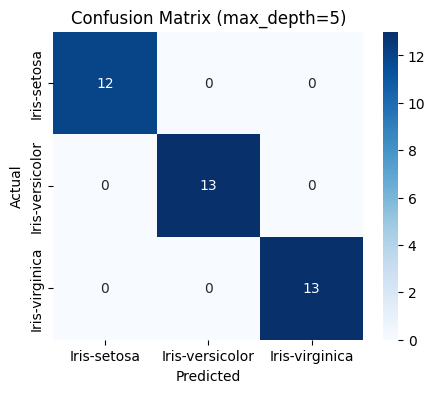


=== Decision Tree (max_depth=None) ===
Test accuracy: 1.0

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



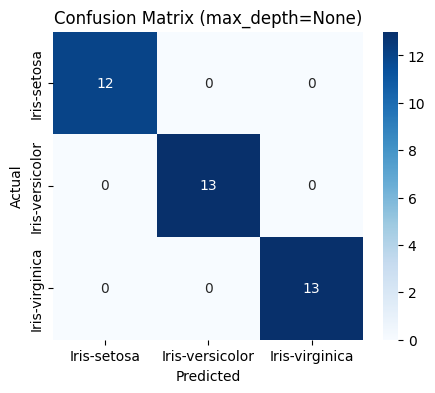

In [47]:
feature_names = df.drop('Species', axis=1).columns
class_names = df['Species'].unique()


for d in depths:
    clf = models[d]
    y_test_pred = clf.predict(X_test)
    print(f"\n=== Decision Tree (max_depth={d}) ===")
    print("Test accuracy:", accuracy_score(y_test, y_test_pred))
    print("\nClassification report:\n", classification_report(y_test, y_test_pred, target_names=class_names))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (max_depth={d})')
    plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale features for LR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
lr.fit(X_train_scaled, y_train)
y_test_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression test accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("\nLogistic classification report:\n", classification_report(y_test, y_test_pred_lr, target_names=class_names))


Logistic Regression test accuracy: 0.9736842105263158

Logistic classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



c:\Users\daksh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### (e) Visualization

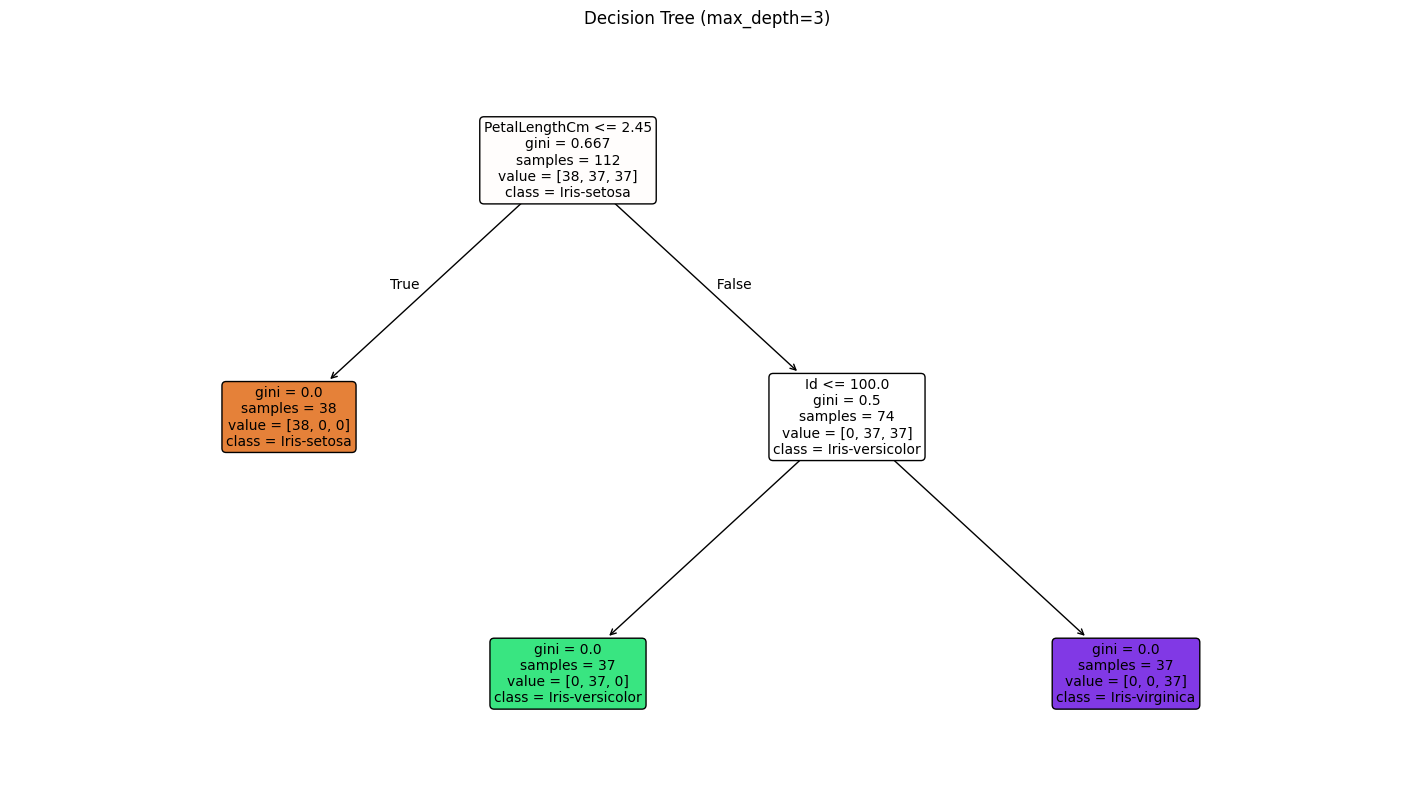

In [49]:
from sklearn.tree import plot_tree

# Pick the tree to visualize (e.g., depth=3)
tree_to_plot = models[3]

plt.figure(figsize=(18,10))
plot_tree(tree_to_plot,
          feature_names=feature_names,
          class_names=class_names,
          filled=True, rounded=True,
          fontsize=10)
plt.title("Decision Tree (max_depth=3)")
plt.show()
